# 파이썬으로 배우는 통계학
### 아래 내용 정리는 다음 웹사이트를 참고하였습니다.
참고사이트:  https://partrita.github.io/posts/thinkstat2/

0. 통계적사고
1. 탐색적 자료 분석: 일화적증거(anecdotal evidence)의 한계 
2. 분포 확인
3. 확률 질량 함수
4. 누적 분포 함수
5. 분포 모델
6. 확률밀도함수
7. 변수간 관계
8. 추정
9. 가설검정
10. 선형최소제곱(Linear Least Squares)
11. 회귀
12. 시계열분석
13. 생존분석
14. 해석적 방법(Analytic method)
15. 요약


In [2]:
import warnings
warnings.filterwarnings("ignore")   # 경고문 끄기

### !필요한 모듈 import

In [3]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns

### !코랩에 파일 업로드하기

In [14]:
from google.colab import files
myfile = files.upload()

Saving DCM_training.csv to DCM_training (3).csv


### [ 1. cvs파일에서 데이터 읽어오기 ]

In [15]:
# data = pd.read_excel(io.BytesIO(myfile['DCM_toydata.xlsx']))
train = pd.read_csv(io.BytesIO(myfile['DCM_training.csv'])) 

In [9]:
from google.colab import files
myfile = files.upload()

Saving DCM_test.csv to DCM_test.csv


In [10]:
test = pd.read_csv(io.BytesIO(myfile['DCM_test.csv']))

In [16]:
print("train-data 컬럼수 = ", len(train.columns))
print("train-data 열 수 = ", len(train.index))
print("test-data 컬럼수 = ", len(test.columns))
print("test-data 열 수 = ", len(test.index))

train-data 컬럼수 =  61
train-data 열 수 =  149
test-data 컬럼수 =  61
test-data 열 수 =  51


### [ 2. 컬럼명 읽어오기 ]
    - (1) data_top = data.head()  
    - (2) data.columns
    - (3) for col in data.columns: print(col)  
    - (4) list(data.columns)

In [17]:
#%% (1) data.columns 사용하기
train.columns

Index(['일련번호', 'Unnamed: 1', 'Serial No. ', 'Unit No. ', 'Sex', 'Age',
       'exclusion', 'MRI date', 'Height', 'weight', 'BSA(m2)', 'BMI \n(kg/m2)',
       'systolic BP\n(mmHg)', 'diastolic BP\n(mmHg)',
       'Heart rate\n(beats/min)', 'Creatinine', 'eGFR \n(ml/min/1.73m2)',
       'Creatinine_시행일자', 'Sodium', 'Sodium_시행일자', 'NT-proBNP(pg/mL)_결과값',
       'NT-proBNP_시행일자', 'Hematocrit\n (%)', 'Hematocrit_시행일자',
       'NYHA \nfunctional class (I~IV)', 'NYHA_binary', '기록 작성일자',
       'Diabetes (확진)', '진단일자', 'smoking\n(current or previous)',
       'Family history of cardiomyopathy or sudden cardiac death',
       'History of atrial fibrillation', '진단일자.1',
       'Initial echocardiography date', 'LVEF1', 'LVEDD1',
       'F/U echocardiography date', 'LVEF2', 'LVEDD2', 'Echo_interval',
       'Death', 'Cause of death ', 'MI Hx', 'MI _date', 'stress ECG',
       'stess_date', 'SPECT', 'SPECT\n_date', 'Heart_CT', 'HeartCT\n_date',
       'CAG\n(coronary angiography)', 'CAG\n(Comment)'

In [19]:
print("열 개수 :", len(train.columns))   # 열 수
print("행 개수 :", len(train.index))     # 행 수

열 개수 : 61
행 개수 : 149


In [20]:
#%% (2) data.head() 사용하기
train_top = train.head(1)
train_top

,일련번호,Unnamed: 1,Serial No.,Unit No.,Sex,Age,exclusion,MRI date,Height,weight,BSA(m2),BMI \n(kg/m2),systolic BP\n(mmHg),diastolic BP\n(mmHg),Heart rate\n(beats/min),Creatinine,eGFR \n(ml/min/1.73m2),Creatinine_시행일자,Sodium,Sodium_시행일자,NT-proBNP(pg/mL)_결과값,NT-proBNP_시행일자,Hematocrit\n (%),Hematocrit_시행일자,NYHA \nfunctional class (I~IV),NYHA_binary,기록 작성일자,Diabetes (확진),진단일자,smoking\n(current or previous),Family history of cardiomyopathy or sudden cardiac death,History of atrial fibrillation,진단일자.1,Initial echocardiography date,LVEF1,LVEDD1,F/U echocardiography date,LVEF2,LVEDD2,Echo_interval,Death,Cause of death,MI Hx,MI _date,stress ECG,stess_date,SPECT,SPECT\n_date,Heart_CT,HeartCT\n_date,CAG\n(coronary angiography),CAG\n(Comment),CAG\n(a. Clinical diagnosis),CAG\n(b. Anatomical diagnosis),CAG\n(Conclusions),CAG_date,LVEF호전,LVEDDi감소,LVRR,LVEF2>45%,LGE%
0,1,NaN,5,1104447,M,65,0,2012-04-05,161.0,57.0,1.597,21.99,120.0,80.0,78.0,0.62,130,2012-04-04,141.0,2012-04-04,296.0,2014-02-06,39.6,2012-04-04,2.0,2.0,2012-05-07,No,NaN,Y,No,No,NaN,2012-04-06,30,61,2013-02-07,40,65.0,307,NaN,NaN,N,NaN,"- 키: 160 cm, 체중: 56 kg\n\n- 최대산소섭취량(VO2pea...",2015-06-08,Hx: EKG abnormality \nHTN/DM (+/-) \nEKG: 20...,2012-03-30,NaN,NaN,Rt. CFA c 7Fr sheath → Proglide (+)\n\n\nRCA c...,NaN,NaN,NaN,Minimal CAD,2012-04-03,1,0,0,0,6.83


In [21]:
print("열 개수 :", len(train.columns))   # 열 수
print("행 개수 :", len(train.index))     # 행 수

열 개수 : 61
행 개수 : 149


In [22]:
#%% 반복문 사용하기
for col in train.columns:
    print(col)

일련번호
Unnamed: 1
Serial No. 
Unit No. 
Sex
Age
exclusion
MRI date
Height
weight
BSA(m2)
BMI 
(kg/m2)
systolic BP
(mmHg)
diastolic BP
(mmHg)
Heart rate
(beats/min)
Creatinine
eGFR 
(ml/min/1.73m2)
Creatinine_시행일자
Sodium
Sodium_시행일자
NT-proBNP(pg/mL)_결과값
NT-proBNP_시행일자
Hematocrit
 (%)
Hematocrit_시행일자
NYHA 
functional class (I~IV)
NYHA_binary
기록 작성일자
Diabetes (확진)
진단일자
smoking
(current or previous)
Family history of cardiomyopathy or sudden cardiac death
History of atrial fibrillation
진단일자.1
Initial echocardiography date
LVEF1
LVEDD1
F/U echocardiography date
LVEF2
LVEDD2
Echo_interval
Death
Cause of death 
MI Hx
MI _date
stress ECG
stess_date
SPECT
SPECT
_date
Heart_CT
HeartCT
_date
CAG
(coronary angiography)
CAG
(Comment)
CAG
(a. Clinical diagnosis)
CAG
(b. Anatomical diagnosis)
CAG
(Conclusions)
CAG_date
LVEF호전
LVEDDi감소
LVRR
LVEF2>45%
LGE%


In [23]:
print("열 개수 :", len(train.columns))   # 열 수
print("행 개수 :", len(train.index))     # 행 수

열 개수 : 61
행 개수 : 149


In [24]:
#%% 리스트 함수 사용하기
list(train.columns)

['일련번호',
 'Unnamed: 1',
 'Serial No. ',
 'Unit No. ',
 'Sex',
 'Age',
 'exclusion',
 'MRI date',
 'Height',
 'weight',
 'BSA(m2)',
 'BMI \n(kg/m2)',
 'systolic BP\n(mmHg)',
 'diastolic BP\n(mmHg)',
 'Heart rate\n(beats/min)',
 'Creatinine',
 'eGFR \n(ml/min/1.73m2)',
 'Creatinine_시행일자',
 'Sodium',
 'Sodium_시행일자',
 'NT-proBNP(pg/mL)_결과값',
 'NT-proBNP_시행일자',
 'Hematocrit\n (%)',
 'Hematocrit_시행일자',
 'NYHA \nfunctional class (I~IV)',
 'NYHA_binary',
 '기록 작성일자',
 'Diabetes (확진)',
 '진단일자',
 'smoking\n(current or previous)',
 'Family history of cardiomyopathy or sudden cardiac death',
 'History of atrial fibrillation',
 '진단일자.1',
 'Initial echocardiography date',
 'LVEF1',
 'LVEDD1',
 'F/U echocardiography date',
 'LVEF2',
 'LVEDD2',
 'Echo_interval',
 'Death',
 'Cause of death ',
 'MI Hx',
 'MI _date',
 'stress ECG',
 'stess_date',
 'SPECT',
 'SPECT\n_date',
 'Heart_CT',
 'HeartCT\n_date',
 'CAG\n(coronary angiography)',
 'CAG\n(Comment)',
 'CAG\n(a. Clinical diagnosis)',
 'CAG\n(b. Anatomi

In [25]:
print("열 개수 :", len(train.columns))   # 열 수
print("행 개수 :", len(train.index))     # 행 수

열 개수 : 61
행 개수 : 149


### 컬럼(Column) 명칭에 대한 설명
  
   - **일련번호 :** 일련번호  
   - **Unnamed: 1 :** 비식별컬럼
   - **Serial No. :** Serial 넘버  
   - **Unit No. :** 환자번호(확인해볼것!)  
   - **Sex :** 성별  
   - **Age :** 나이  
   - **exclusion :** 배제기준(확인해볼것!)  
   - **MRI date :** MRI 영상 촬영 날짜  
   - **Height :** 키  
   - **weight :** 몸무게  
   - **BSA(m2) :** 체표면적(Body surface area: BSA), 관동맥 직경의 결정인자  
   - **BMI(kg/m2) :** 체질량지수(Body Mass Index), 관동맥 직경의 결정인자  
   - **systolic BP(mmHg) :** 수축기혈압(심장이 수축한 상태의 혈압으로 최고혈압: 정상범위 100~139 mmHg)  
   - **diastolic BP(mmHg) :** 확장기혈압(심장이 확장했을 떄의 혈압으로, 최저혈압: 정상범위 WHO기준 89mmHg 이하)  
   - **Heart rate(beats/min) :** 심박수(심장의 박동수 또는 맥박수: 신생아경우 130회/min, 아동의 경우: 80 ~ 90/min, 20세 이상 70 ~ 75/min, 신체가 작을 수록 많음거나 체온 상승시 8회/1도 증가)  
   - **Creatinine :** 크레아티닌(혈청), 이것이 증가하는 질환: 요독증, 만성신염, 요로폐색(크레아틴은 근육수축의 에너지원인 크레아틴인산(에너지의 저장고)의 구성성분, 생체내 이용되어 그 탈수물인 크레아티닌은 신장을 통해 요중에 배설되며 생리적으로 아주 다른 작용을 함) 
   - **eGFR(ml/min/1.73m2) :** 상피세포 성장인자 수용체(Epidermal Growth Factor Receptor)
   - **Creatinine_시행일자 :**
   - **Sodium :**
   - **Sodium_시행일자 :**
   - **NT-proBNP(pg/mL)_결과값 :**
   - **NT-proBNP_시행일자 :**
   - **Hematocrit(%) :**
   - **Hematocrit_시행일자 :**
   - **NYHA :**
   - **functional class (I~IV) :**
   - **NYHA_binary 기록 작성일자 :**
   - **Diabetes (확진) :**
   - **진단일자 :** 
   - **smoking(current or previous) :**
   - **Family history of cardiomyopathy or sudden cardiac death :**
   - **History of atrial fibrillation :** 
   - **진단일자 :**  
   - **Initial echocardiography date :**
   - **LVEF1 :**
   - **LVEDD1 :**
   - **F/U echocardiography date :**
   - **LVEF2 :**
   - **LVEDD2 :**
   - **Echo_interval :**
   - **Death :**
   - **Cause of death :**
   - **MI Hx :** 
   - **MI _date :**
   - **stress ECG :**
   - **stess_date :**
   - **SPECT :**
   - **SPECT_date :**
   - **Heart_CT :**
   - **HeartCT_date :**
   - **CAG(coronary angiography) :**
   - **CAG(Comment) :**
   - **CAG(a. Clinical diagnosis) :**
   - **CAG(b. Anatomical diagnosis) :**
   - **CAG(Conclusions) :**
   - **CAG_date :**
   - **LVEF호전 :**
   - **LVEDDi감소 :**
   - **LVRR :**
   - **LVEF2>45% :**
   - **LGE% :**

### [ 3. 컬럼명을 보기좋게 정리하기 ] (검색에 편리를 위함)

In [26]:
# 컬럼명 정리하기 
columns = ['일련번호', 'Unnamed:1', 'SerialNo', 'UnitNo', 'Sex', 'Age', 'Exclusion', 'MRI-date', 'Height', 'Weight', 'BSA', 'BMI',
       'Systolic-BP', 'Diastolic-BP', 'Heart_rate[bt/min]', 'Creatinine', 'eGFR[ml/min/1.73m2]', 'Creatinine시행일', 'Sodium', 
       'Sodium시행일', 'NT-proBNP[pg/mL]결과값', 'NT-proBNP시행일', 'Hematocrit(%)', 'Hematocrit시행일', 'NYHA_class(I-IV)', 
       'NYHA_binary', '기록작성일자', 'Diabetes(확진)', '진단일자', 'smoking(current/previous)', 'Cardiomyopathy/SuddenCardiacDeath(가족력유무)',
       'History of atrial fibrillation', '진단일자', 'Initial_Echocardiography_date', 'LVEF1', 'LVEDD1', 'F/U_Echocardiography_date', 
       'LVEF2', 'LVEDD2', 'Echo_interval', 'Death', 'Cause_of_death', 'MI_Hx', 'MI_date', 'Stress_ECG', 'stess_date', 'SPECT', 'SPECT_date', 
       'Heart_CT', 'HeartCT_date', 'CAG(Coronary_angiography)', 'CAG(Comment)', 'CAG(a:Clinical_diagnosis)', 'CAG(b:Anatomical_diagnosis)',
       'CAG(Conclusions)', 'CAG_date', 'LVEF호전', 'LVEDDi감소', 'LVRR', 'LVEF2>45%', 'LGE%']
# print(columns)

In [27]:
train.columns = columns   # data에 보기좋게 정리한 columns명을 대입한다.
print(train.columns)

Index(['일련번호', 'Unnamed:1', 'SerialNo', 'UnitNo', 'Sex', 'Age', 'Exclusion',
       'MRI-date', 'Height', 'Weight', 'BSA', 'BMI', 'Systolic-BP',
       'Diastolic-BP', 'Heart_rate[bt/min]', 'Creatinine',
       'eGFR[ml/min/1.73m2]', 'Creatinine시행일', 'Sodium', 'Sodium시행일',
       'NT-proBNP[pg/mL]결과값', 'NT-proBNP시행일', 'Hematocrit(%)', 'Hematocrit시행일',
       'NYHA_class(I-IV)', 'NYHA_binary', '기록작성일자', 'Diabetes(확진)', '진단일자',
       'smoking(current/previous)', 'Cardiomyopathy/SuddenCardiacDeath(가족력유무)',
       'History of atrial fibrillation', '진단일자',
       'Initial_Echocardiography_date', 'LVEF1', 'LVEDD1',
       'F/U_Echocardiography_date', 'LVEF2', 'LVEDD2', 'Echo_interval',
       'Death', 'Cause_of_death', 'MI_Hx', 'MI_date', 'Stress_ECG',
       'stess_date', 'SPECT', 'SPECT_date', 'Heart_CT', 'HeartCT_date',
       'CAG(Coronary_angiography)', 'CAG(Comment)',
       'CAG(a:Clinical_diagnosis)', 'CAG(b:Anatomical_diagnosis)',
       'CAG(Conclusions)', 'CAG_date', 'LVEF호전', 'L

### [ 4. 분석에 필요한 변수값 추출하기 ]
    - 분석 타겟: Systolic-BP에 영향을 미치는 주요인 분석

In [28]:
train_main = train[['Sex', 'Age', 'Height', 'Weight', 'BMI', 'Systolic-BP', 'Diastolic-BP', 'Heart_rate[bt/min]']]
train_main.head(2)

,Sex,Age,Height,Weight,BMI,Systolic-BP,Diastolic-BP,Heart_rate[bt/min]
0,M,65,161.0,57.0,21.99,120.0,80.0,78.0
1,M,49,167.0,64.0,22.95,NaN,NaN,NaN


In [29]:
pd.set_option('display.max_colwidth', -1)
train['Cardiomyopathy/SuddenCardiacDeath(가족력유무)']

0      No
1      No
2      No
3      No
4      No
       ..
144    No
145    No
146    No
147    No
148    No
Name: Cardiomyopathy/SuddenCardiacDeath(가족력유무), Length: 149, dtype: object

### EDA 

In [30]:
train_main.corr(method = 'pearson')

,Age,Height,Weight,BMI,Systolic-BP,Diastolic-BP,Heart_rate[bt/min]
Age,1.000000,-0.358651,-0.422165,-0.316356,0.091151,-0.101671,-0.278417
Height,-0.358651,1.000000,0.633120,0.224377,0.148798,0.213995,-0.041844
Weight,-0.422165,0.633120,1.000000,0.890843,0.319270,0.290218,0.081378
BMI,-0.316356,0.224377,0.890843,1.000000,0.318840,0.236004,0.138567
Systolic-BP,0.091151,0.148798,0.319270,0.318840,1.000000,0.560170,0.026957
Diastolic-BP,-0.101671,0.213995,0.290218,0.236004,0.560170,1.000000,0.182021
Heart_rate[bt/min],-0.278417,-0.041844,0.081378,0.138567,0.026957,0.182021,1.000000


### 피어슨의 상관계수는 일반적으로,

  값이 -1.0 ~ -0.7 이면, 강한 음적 상관관계

  값이 -0.7 ~ -0.3 이면, 뚜렷한 음적 상관관계

  값이 -0.3 ~ -0.1 이면, 약한 음적 상관관계

  값이 -0.1 ~ +0.1 이면, 없다고 할 수 있는 상관관계

  값이 +0.1 ~ +0.3 이면, 약한 양적 상관관계

  값이 +0.3 ~ +0.7 이면, 뚜렷한 양적 상관관계

  값이 +0.7 ~ +1.0 이면, 강한 양적 상관관계  
출처: https://sno-machinelearning.tistory.com/68 [스노의 머신러닝 스터디 정리]

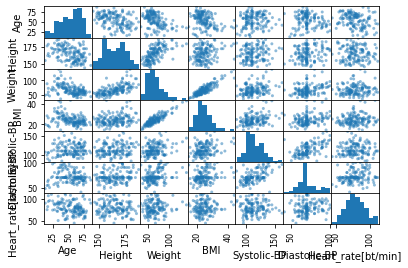

<Figure size 1080x1080 with 0 Axes>

In [34]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_main)
plt.figure(figsize=(15,15))
plt.show()

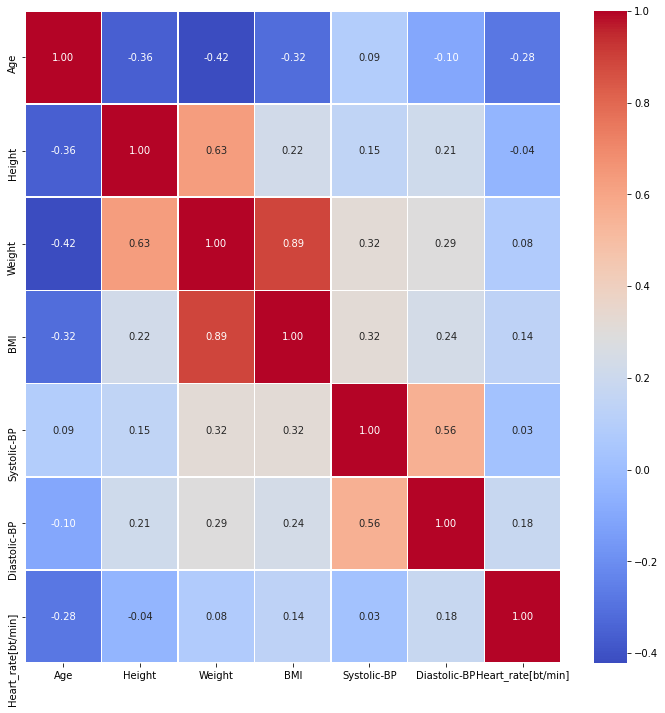

In [33]:
plt.figure(figsize=(12,12))
sns.heatmap(data = train_main.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='coolwarm')